In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
stroke <- read_csv("https://raw.githubusercontent.com/Megunight/dsci100-project/main/stroke_prediction_dataset.csv")


Rows: 15000 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Patient Name, Gender, Marital Status, Work Type, Residence Type, S...
dbl  (8): Patient ID, Age, Hypertension, Heart Disease, Average Glucose Leve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
names(stroke) <- c("patient_id", "patient_name", "age", "gender", "hypertension", "heart_disease", "marital_status",
                  "work_type", "residence_type", "average_glucose_level", "bmi", "smoking_status", "alcohol_intake", "physical_activity",
                  "stroke_history", "family_history_of_stroke", "dietary_habits", "stress_levels", "blood_pressure_levels",
                  "cholesterol_levels", "symptoms", "diagnosis")
stroke

patient_id,patient_name,age,gender,hypertension,heart_disease,marital_status,work_type,residence_type,average_glucose_level,⋯,alcohol_intake,physical_activity,stroke_history,family_history_of_stroke,dietary_habits,stress_levels,blood_pressure_levels,cholesterol_levels,symptoms,diagnosis
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,⋯,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,⋯,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,⋯,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,⋯,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Headache, Confusion",No Stroke
48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,⋯,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
29307,Advika Kota,62,Female,0,0,Single,Private,Urban,91.60,⋯,Social Drinker,High,0,No,Gluten-Free,4.85,132/64,"HDL: 80, LDL: 69",Severe Fatigue,Stroke
25525,Elakshi Karan,40,Female,1,0,Married,Private,Urban,77.83,⋯,Never,Low,1,No,Vegetarian,6.38,178/105,"HDL: 31, LDL: 134",NA,No Stroke
4809,Shalv Dugar,61,Female,0,1,Divorced,Government Job,Rural,194.73,⋯,Rarely,Moderate,1,No,Vegan,5.85,179/72,"HDL: 66, LDL: 134",Loss of Balance,Stroke
7372,Raghav Handa,72,Female,1,1,Married,Self-employed,Rural,72.99,⋯,Rarely,High,1,No,Vegetarian,0.73,141/106,"HDL: 71, LDL: 140","Loss of Balance, Dizziness, Difficulty Speaking",Stroke


In [4]:
stroke_selected <- stroke |>
                    select(age, 
                           stress_levels,
                           work_type,
                           marital_status,
                           residence_type,
                           diagnosis)
stroke_selected

age,stress_levels,work_type,marital_status,residence_type,diagnosis
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
56,3.48,Self-employed,Married,Rural,Stroke
80,1.73,Self-employed,Single,Urban,Stroke
26,7.31,Never Worked,Married,Rural,Stroke
73,5.35,Never Worked,Married,Urban,No Stroke
51,6.84,Self-employed,Divorced,Urban,Stroke
62,4.85,Private,Single,Urban,Stroke
40,6.38,Private,Married,Urban,No Stroke
61,5.85,Government Job,Divorced,Rural,Stroke
72,0.73,Self-employed,Married,Rural,Stroke


In [5]:
stroke_sample <- stroke_selected |>
                sample_n(1000)
stroke_sample

age,stress_levels,work_type,marital_status,residence_type,diagnosis
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
28,4.10,Private,Divorced,Urban,Stroke
50,1.77,Self-employed,Divorced,Rural,No Stroke
68,3.96,Private,Divorced,Urban,No Stroke
82,8.68,Self-employed,Divorced,Rural,Stroke
18,3.71,Private,Married,Rural,No Stroke
33,8.32,Never Worked,Married,Urban,No Stroke
37,9.91,Private,Single,Urban,No Stroke
74,9.88,Private,Single,Urban,Stroke
74,0.74,Never Worked,Married,Urban,Stroke


Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


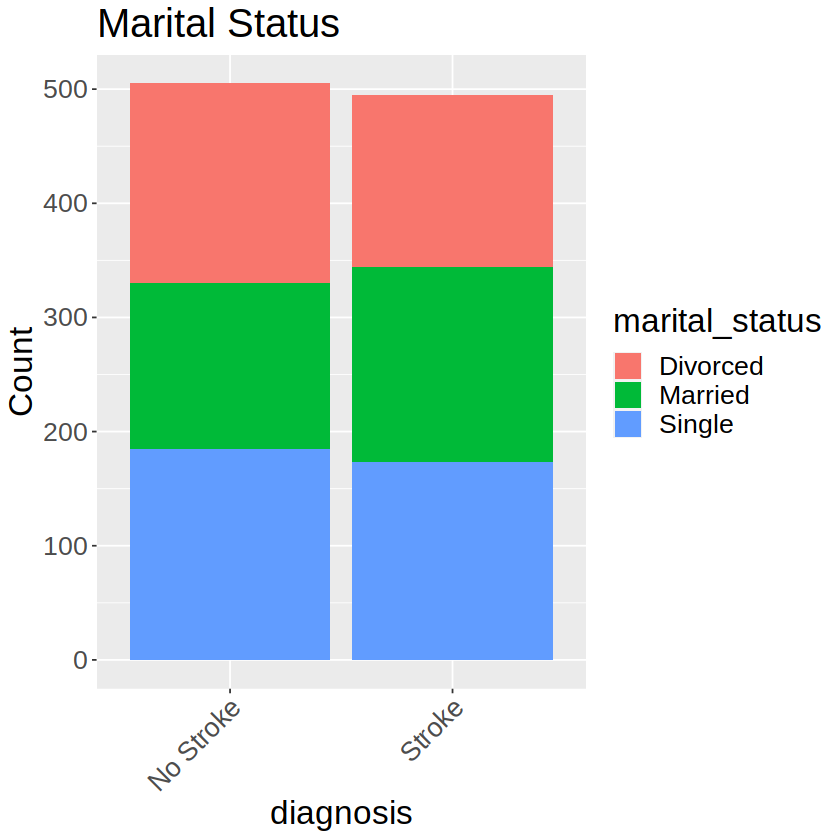

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


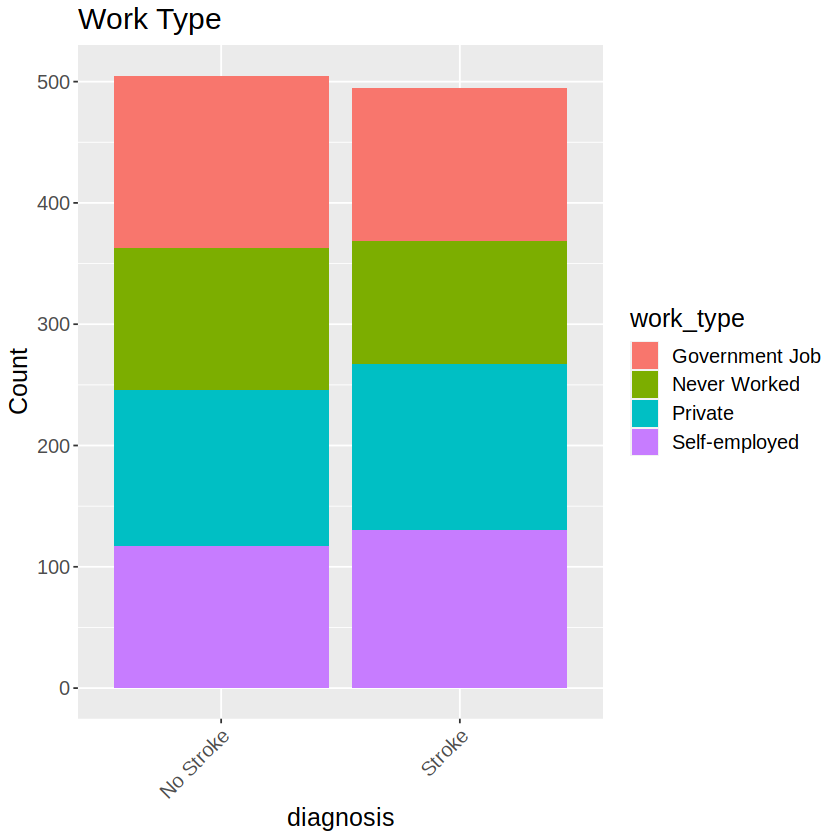

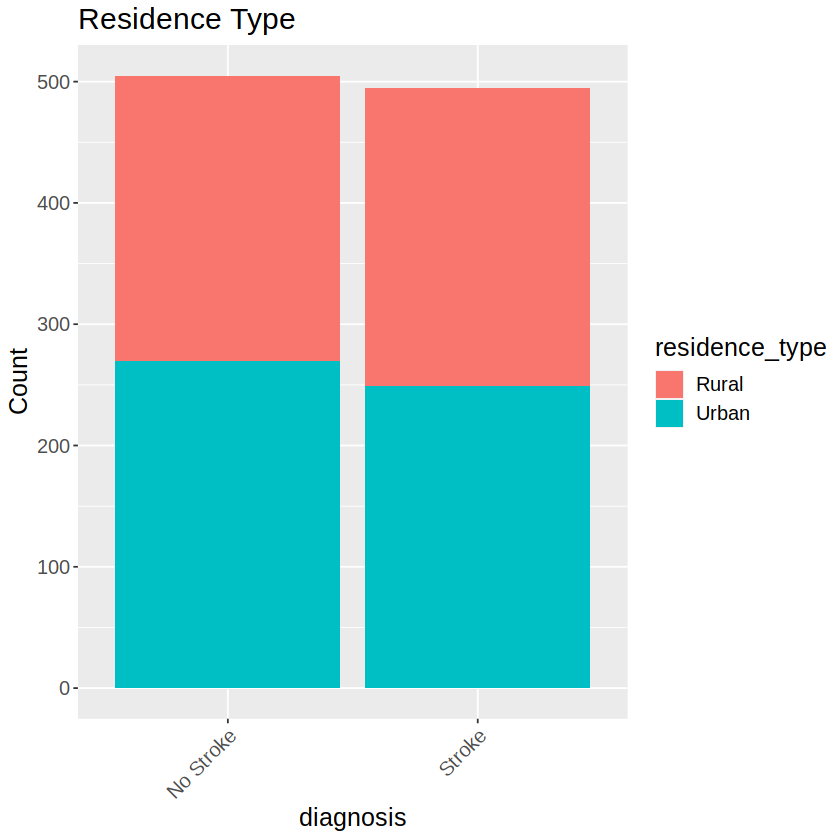

In [6]:
options(repr.plot.width = 7, repr.plot.height = 7)

stroke_marital <- stroke_sample |>
            ggplot(aes(x = diagnosis, fill = marital_status)) +
            geom_histogram(stat = "count") +
            labs(y = "Count") +
            ggtitle("Marital Status") +
            theme(text = element_text(size = 20)) +
            theme(axis.text.x = element_text(angle = 45, hjust = 1))
stroke_marital


stroke_work <- stroke_sample |>
            ggplot(aes(x = diagnosis, fill = work_type)) +
            geom_histogram(stat = "count") +
            labs(y = "Count") +
            ggtitle("Work Type") +
            theme(text = element_text(size = 15))  +
            theme(axis.text.x = element_text(angle = 45, hjust = 1))
stroke_work

stroke_residence <- stroke_sample |>
            ggplot(aes(x = diagnosis, fill = residence_type)) +
            geom_histogram(stat = "count") +
            labs(y = "Count") +
            ggtitle("Residence Type") +
            theme(text = element_text(size = 15))  +
            theme(axis.text.x = element_text(angle = 45, hjust = 1))
stroke_residence

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


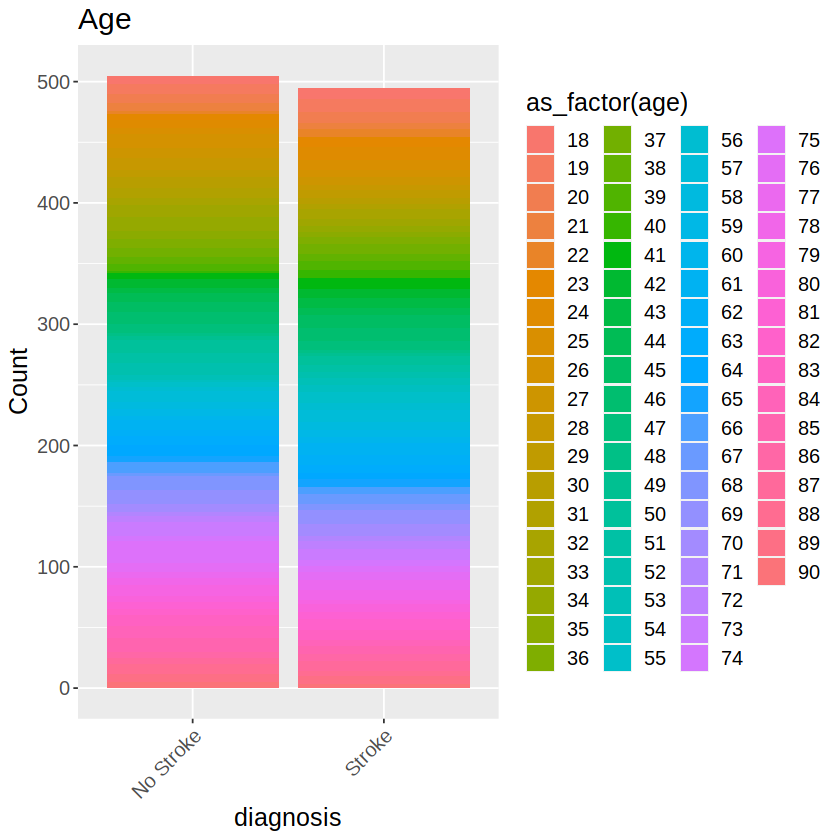

In [10]:
options(repr.plot.width = 7, repr.plot.height = 7)

stroke_age <- stroke_sample |>
            ggplot(aes(x = diagnosis, fill = as_factor(age))) +
            geom_histogram(stat = "count") +
            labs(y = "Count") +
            ggtitle("Age") +
            theme(text = element_text(size = 15))  +
            theme(axis.text.x = element_text(angle = 45, hjust = 1))
stroke_age

